In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#Wczytywanie danych

In [116]:
# data = pd.read_csv('https://raw.githubusercontent.com/karolinaprygiel/ai-project/main/healthcare-dataset-stroke-data.csv')
data = pd.read_csv('healthcare-dataset-stroke-data.csv')



### Rzućmy okiem na wczytane dane

In [117]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


###Opisy kolumn (zgodnie z opisem na stronie)
1) id: unique identifier <br>
2) gender: "Male", "Female" or "Other" <br>
3) age: age of the patient <br>
4) hypertension: 0 if the patient  doesn't have hypertension, 1 if the patient has hypertension<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not<br>

In [ ]:
data.info()

Dataset zawiera 12 kolumn i 5110 rekordów.<br>
Dataset zawiera zarówno dane dyskretne, ciągłe jak i tekstowe.
  


#Wizualizacja danych


##Przyjrzymy się danym kategorycznym

Text(0.5, 1.0, 'Czy palacz')

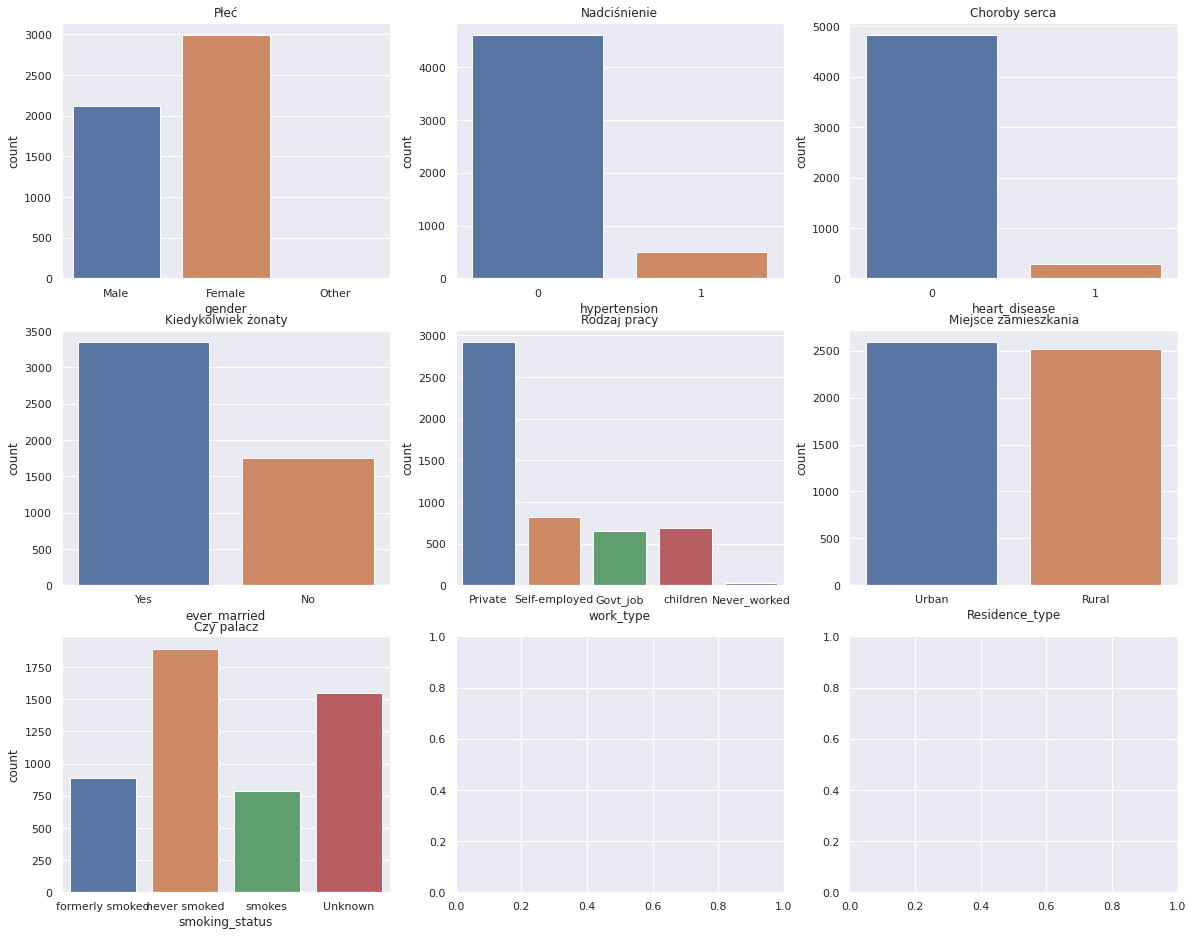

In [ ]:
fig,axes = plt.subplots(3,3,figsize = (20,16))
sns.countplot(ax=axes[0,0],x='gender', data=data).set_title("Płeć")
sns.countplot(ax=axes[0,1],x='hypertension', data=data).set_title("Nadciśnienie")
sns.countplot(ax=axes[0,2],x='heart_disease', data=data).set_title("Choroby serca")
sns.countplot(ax=axes[1,0],x='ever_married', data=data).set_title("Kiedykolwiek żonaty")
sns.countplot(ax=axes[1,1],x='work_type', data=data).set_title("Rodzaj pracy")
sns.countplot(ax=axes[1,2],x='Residence_type', data=data).set_title("Miejsce zamieszkania")
sns.countplot(ax=axes[2,0],x='smoking_status', data=data).set_title("Czy palacz")

####Wnioski


W datasecie jest więcej danych nt. mężczyzn, ale nie jest to różnica bardzo duża.<br>
Zdecydowana większość osób nie ma problemów z sercem ani nadciśnieiem.<br>
Większość danych dotyczy osób pracujących, będących w związku małżeńskim, w większości pracujących w sektorze prywatnym. <br>
Większość osób nigdy nie paliła, ale należy zwrócic uwagę na bardzo dużą ilość brakujących danych na ten temat.


##Podobnie spójrzmy teraz na dane liczbowe

###Wiek

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


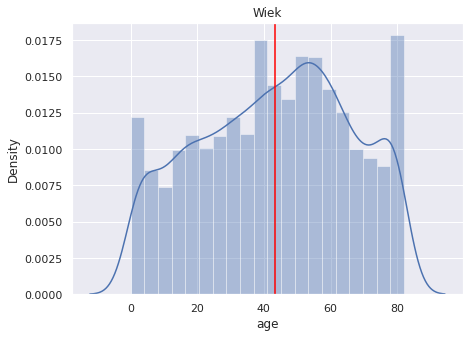

In [ ]:
fig = plt.figure(figsize = (7,5))
sns.distplot(data['age'], kde="True", ax=fig.gca()).set_title("Wiek")
plt.axvline(data['age'].mean(), color='red')


###BMI

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


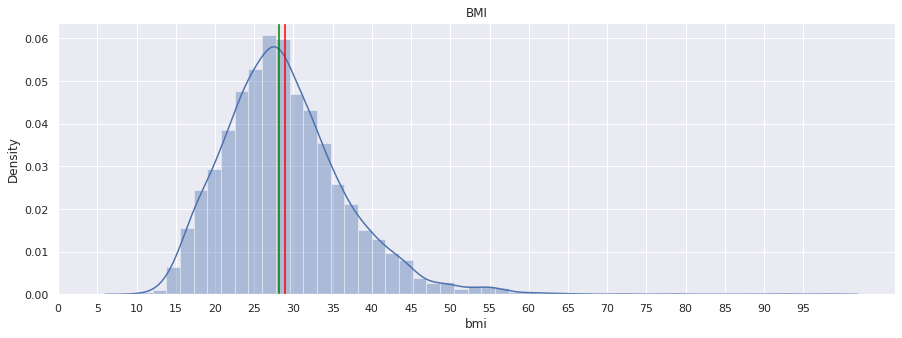

In [ ]:
fig = plt.figure(figsize = (15,5))
sns.distplot(data['bmi'], kde="True", ax=fig.gca()).set_title("BMI")
plt.xticks(np.arange(0,100,5))
plt.axvline(data['bmi'].mean(), color='red')
plt.axvline(data['bmi'].median(), color='green')


**NORMY BM**<br>
wygłodzenie – wynik poniżej 16,<br>
wychudzenie – wynik 16-16,9,<br>
niedowaga – wynik 17 - 18,5,<br>
prawidłowa waga – wynik 18,5-24,9,<br>
nadwaga – wynik powyżej 25-29,9,<br>
otyłość – wynik 30-34,9,<br>
otyłość kliniczna – wynik 35-39,9,<br>
otyłość skrajna – wynik powyżej 40<br>

In [ ]:
print((data[data["bmi"] > 40 ]).shape[0])
print((data[data["bmi"] > 50 ]).shape[0])

408
79


In [ ]:
data[(data["bmi"] >= 50 ) & (data["stroke"] == 1)]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
113,41069,Female,45.0,0,0,Yes,Private,Rural,224.1,56.6,never smoked,1


###Poziom cukru we krwi

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


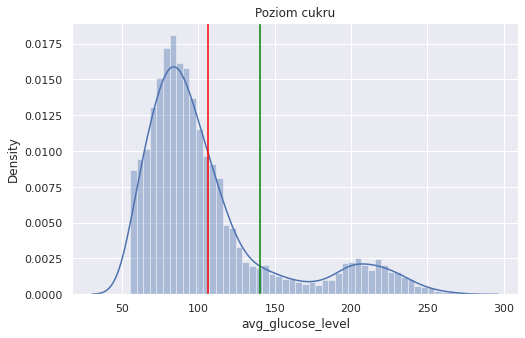

In [ ]:
fig = plt.figure(figsize = (8,5))
sns.distplot(data['avg_glucose_level'], kde="True", ax=fig.gca()).set_title("Poziom cukru")
plt.axvline(data['avg_glucose_level'].mean(), color='red')
plt.axvline(140, color='green')


In [ ]:
glucose_levels = {'Poziom cukru' : ['< 140 mg/dL', 'Między 140 a 200 mg/dL ', '≥ 200 mg/dL'], 
                  'Interpretacja': ['Prawidłowy poziom glukozy', 'Nieprawidłowy poziom glukozy', 'Cukrzyca']}
glucose_levels_df = pd.DataFrame(glucose_levels)  
glucose_levels_df

,Poziom cukru,Interpretacja
0,< 140 mg/dL,Prawidłowy poziom glukozy
1,Między 140 a 200 mg/dL,Nieprawidłowy poziom glukozy
2,≥ 200 mg/dL,Cukrzyca


###Wnioski

Data set zawiera dane osób ze wszystkich grup wiekowych, ze średnią wieku 40 lat. <br>
BMI zachowuje rozkład normalny, ze średnią wskazującą na nadwagę, uwagę jednak zwraca, że niemal 10% osób jest skrajnie otyła (BMI powyżej 40).<br>
Większość osób ma cukier w normie, ale jest też spora ggrupa osób z cukrzycą.


Ze względu na to, że BMI powyżej 50 jest bardzo rzadkie, a mamy takich rekordów prawie 80, wśród których tylko 1 osoba miała udar, możemy usunąć te wartości.

In [ ]:
data.drop(data[data['bmi'] > 50].index, inplace = True)

##Dane kategoryczne vs Udar

Text(0.5, 1.0, 'Czy palacz')

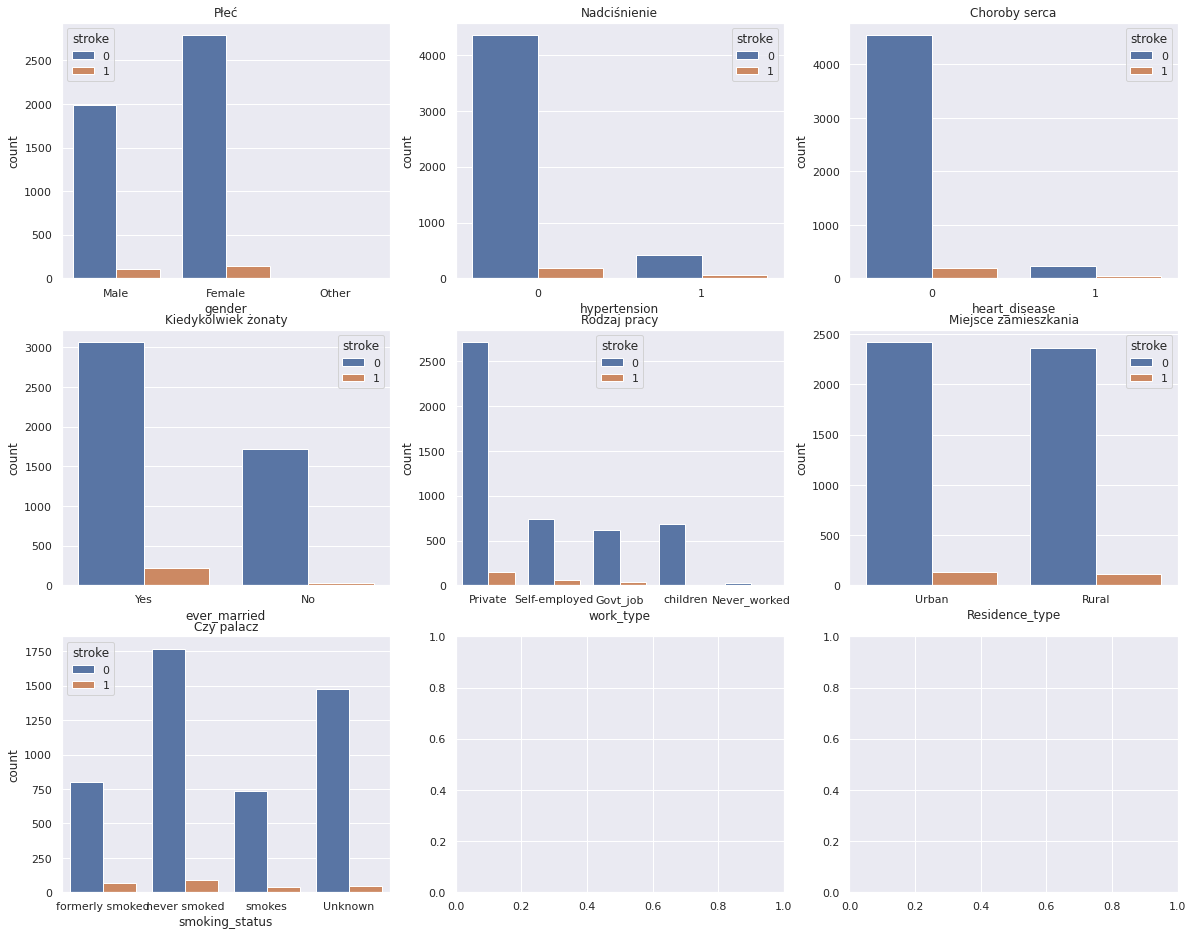

In [ ]:
fig,axes = plt.subplots(3,3,figsize = (20,16))
sns.countplot(ax=axes[0,0],x='gender', hue="stroke", data=data).set_title("Płeć")
sns.countplot(ax=axes[0,1],x='hypertension', hue="stroke", data=data).set_title("Nadciśnienie")
sns.countplot(ax=axes[0,2],x='heart_disease',hue="stroke", data=data).set_title("Choroby serca")
sns.countplot(ax=axes[1,0],x='ever_married', hue="stroke", data=data).set_title("Kiedykolwiek żonaty")
sns.countplot(ax=axes[1,1],x='work_type', hue="stroke", data=data).set_title("Rodzaj pracy")
sns.countplot(ax=axes[1,2],x='Residence_type', hue="stroke", data=data).set_title("Miejsce zamieszkania")
sns.countplot(ax=axes[2,0],x='smoking_status', hue="stroke", data=data).set_title("Czy palacz")

### BMI VS Udar

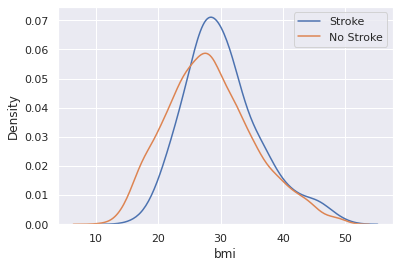

In [ ]:
sns.kdeplot(x=data.loc[data['stroke']==1]['bmi'],label='Stroke')
sns.kdeplot(x=data.loc[data['stroke']==0]['bmi'],label='No Stroke')
plt.legend()
plt.show()

###Wiek VS Udar

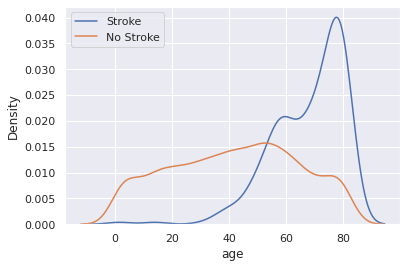

In [ ]:
sns.kdeplot(x=data.loc[data['stroke']==1]['age'],label='Stroke')
sns.kdeplot(x=data.loc[data['stroke']==0]['age'],label='No Stroke')
plt.legend()
plt.show()

Poziom cukru we krwi vs Udar

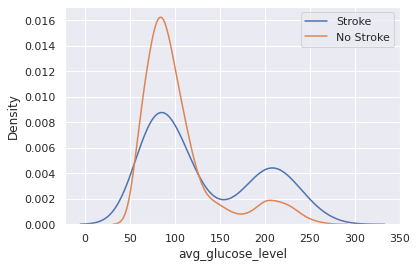

In [ ]:
sns.kdeplot(x=data.loc[data['stroke']==1]['avg_glucose_level'],label='Stroke')
sns.kdeplot(x=data.loc[data['stroke']==0]['avg_glucose_level'],label='No Stroke')
plt.legend()
plt.show()

###Wnioski

Widać bardzo dużą zależność pomiędzy wiekiek a wystąpieniem udaru. Zdecydowana większość osób z udarem, miała ponad 40 lat. <br>
Poziom cukru również zdaje się mieć wpływ na wystąpienie udaru. 

##Zbalansowanie danych

Text(0.5, 1.0, 'Stroke')

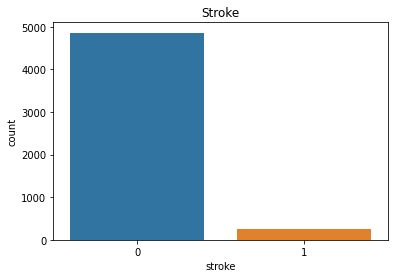

In [ ]:

sns.countplot(x='stroke', data=data).set_title("Stroke")

In [ ]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Jak widzimy, dane są mocno niezbalansowane, czy będzie trzeba zająć się później.

###Korelacja

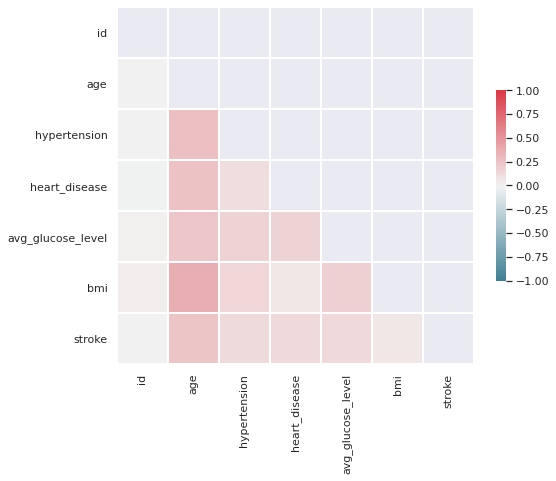

In [ ]:
sns.set(style="darkgrid")

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

Brak silnych korelacji

In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,4830.000000,5031.000000
mean,36606.051878,43.187637,0.095607,0.054661,105.895828,28.444576,0.049294
std,21122.290839,22.729324,0.294081,0.227340,44.986836,7.011582,0.216503
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17864.500000,25.000000,0.000000,0.000000,77.250000,23.500000,0.000000
50%,37031.000000,45.000000,0.000000,0.000000,91.850000,27.900000,0.000000
75%,54751.500000,61.000000,0.000000,0.000000,113.910000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,49.900000,1.000000


##Przetwarzanie danych

Spójrzmy jeszcze raz na dane w poszczególnych kolumnach

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Możemy usunąć kolumnę id**

In [118]:
data.drop(columns=['id'],inplace=True) 
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Kolumna gender zawiera tylko jeden rekord z wartością "other", który również możemy usunąć** 

In [119]:
data["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [120]:
data[data["gender"] == "Other"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [122]:
data.drop(data[data['gender'] == 'Other'].index, inplace = True)

##Problem missing data

In [123]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Wartości w kolumnie *bmi* brakuje w ponad 200 rekordach. To niemal 4% wszystkich danych.


Oprócz tego należy pamiętać o kolumnie smoking_status, w której ponad 1500 rekrdów przyjmowało wartość "Unknown".

###Zajmijmy się najpierw kolumną bmi.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


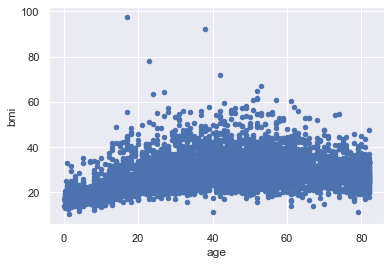

In [83]:
data.plot(x='age', y='bmi', kind='scatter')
plt.show()

In [84]:
print(data[data['gender']=="Male"]["bmi"].mean())
print(data[data['gender']=="Female"]["bmi"].mean())
print(data['bmi'].corr(data['age']))

28.64793635007459
29.065757680358992
0.3333142180677447


Widać korelację między BMI a wiekiem. Płeć zdaje się nie mieć dużego wpływu na BMI.<br>
Dlatego możemy uzupełnić brakujące dane w kolumnie BMI średnią dla swojej grupy wiekowej.

In [ ]:
# def mapAge(x):
#     if (x <= 10):
#         return 0
#     elif (x <=20):
#         return 1
#     elif (x <= 30):
#         return 2
#     else:
#         return 3
    
    
# data['age_group'] = data['age'].map(lambda x: mapAge(x))


In [ ]:
# bmi_groups = data[['age_group', 'bmi']].groupby(['age_group']).mean()
# bmi_groups

In [ ]:

# data.bmi.loc[data.bmi.isnull() & (data['age_group'] == 0)] = 18.9
# data.bmi.loc[data.bmi.isnull() & (data['age_group'] == 1)] = 25.1
# data.bmi.loc[data.bmi.isnull() & (data['age_group'] == 2)] = 27.9
# data.bmi.loc[data.bmi.isnull() & (data['age_group'] == 3)] = 30.43

In [124]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [125]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Kolumna smoking_status


Można przypuszczać, że to, czy osoba pali/paliła ma znaczny wpływ na wystąpienie udaru. Dlatego też, lepiej będzie usunąć te wiersze, które nie posiadają informacji na ten temat.

In [126]:
data=data[data['smoking_status']!='Unknown']

In [127]:
data.shape[0]

3565

##Mapowanie wartości zero-jedynkowych (płeć, stan cywilny, miejsce zamieszkania)

In [128]:
print(data['gender'].unique())
print(data['ever_married'].unique())
print(data['Residence_type'].unique())

['Male' 'Female']
['Yes' 'No']
['Urban' 'Rural']


In [129]:
def gender_mapping(x):
    if x == "Female":
        return 0
    else:
        return 1

def married_mapping(x):
    if x == "No":
        return 0
    else:
        return 1

def residence_mapping(x):
    if x == "Urban":
        return 0
    else:
        return 1

        

In [130]:
data['gender'] = data['gender'].map(lambda x: gender_mapping(x))
data['ever_married'] = data['ever_married'].map(lambda x: married_mapping(x))
data['Residence_type'] = data['Residence_type'].map(lambda x: residence_mapping(x))


In [131]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,0,228.69,36.60000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,1,202.21,28.89456,never smoked,1
2,1,80.0,0,1,1,Private,1,105.92,32.50000,never smoked,1
3,0,49.0,0,0,1,Private,0,171.23,34.40000,smokes,1
4,0,79.0,1,0,1,Self-employed,1,174.12,24.00000,never smoked,1


##One-Hot encoding

In [132]:
print(data['work_type'].unique())
print(data['smoking_status'].unique())

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['formerly smoked' 'never smoked' 'smokes']


In [94]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,0,228.69,36.60000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,1,202.21,28.89456,never smoked,1
2,1,80.0,0,1,1,Private,1,105.92,32.50000,never smoked,1
3,0,49.0,0,0,1,Private,0,171.23,34.40000,smokes,1
4,0,79.0,1,0,1,Self-employed,1,174.12,24.00000,never smoked,1


In [133]:
cat = ['work_type', 'smoking_status']

for i in range(0, len(cat)):
    data[f'{cat[i]}'] = pd.Categorical(data[f'{cat[i]}'])
    dummies = pd.get_dummies(data[f'{cat[i]}'], prefix = f'{cat[i]}_encoded')
    data.drop([f'{cat[i]}'], axis=1, inplace=True)
    data = pd.concat([data, dummies], axis=1)
    
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,1,67.0,0,1,1,0,228.69,36.60000,1,0,0,1,0,0,1,0,0
1,0,61.0,0,0,1,1,202.21,28.89456,1,0,0,0,1,0,0,1,0
2,1,80.0,0,1,1,1,105.92,32.50000,1,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,0,171.23,34.40000,1,0,0,1,0,0,0,0,1
4,0,79.0,1,0,1,1,174.12,24.00000,1,0,0,0,1,0,0,1,0


##Spójrzmy ponownie na korelację

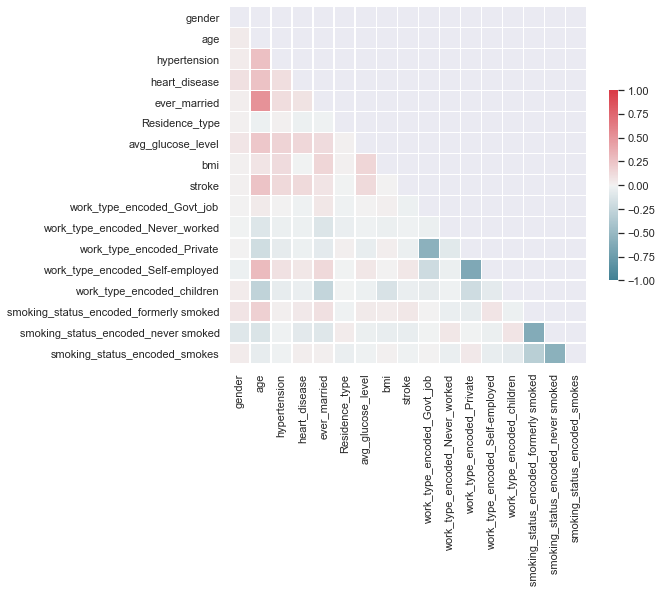

In [96]:
sns.set(style="darkgrid")

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

#Modelowanie danych

In [101]:
from collections import Counter

In [176]:
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)

In [177]:
from sklearn.model_selection import train_test_split


X = data.loc[:, data.columns != "stroke"]
y = data["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2495, 16) (2495,)
(1070, 16) (1070,)


In [178]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 2353), (1, 2353)]


In [179]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_resampled, y_resampled) # doctest : +ELLIPSIS

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [181]:
from sklearn import  metrics
print("F1 on full data       ", metrics.f1_score(y_test, clf.predict(X_test)))
print("F1 on fresamble data  ", metrics.f1_score(y_test, clf.predict(X_test)))

print("Balanced_accuracy_score full  ", metrics.balanced_accuracy_score(y_test, clf.predict(X_test)) )
print("Balanced_accuracy_score       ", metrics.balanced_accuracy_score(y_test, clf.predict(X_test)) )

F1 on full data        0.19858156028368795
F1 on fresamble data   0.19858156028368795
Balanced_accuracy_score full   0.5834983498349835
Balanced_accuracy_score        0.5834983498349835


In [148]:
# from help_plot import plot_decision_regions
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf)
plt.show()

ValueError: X must be a NumPy array. Found <class 'pandas.core.frame.DataFrame'>

Confusion matrix:
 [[2474  889]
 [  74  128]]


<ipython-input-155-7366a506d6ed>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-155-7366a506d6ed>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


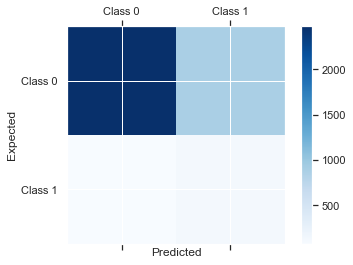

In [155]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y, y_pred=clf.predict(X))
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import  metrics

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

seed=123
kfold = StratifiedKFold(n_splits=5)

In [65]:
pipeline1 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(probability=True))])

param_grid_1 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma':  [0.01, 0.1, 1],
            'classifier__C': [0.01, 0.1, 1]
}
 
grid_1 = GridSearchCV(pipeline1, param_grid_1, cv=kfold, return_train_score=True)



In [73]:
best_model_1 = grid_1.fit(X_train_res, y_train_res)

In [74]:

print(grid_1.best_params_)
model_1_pred = best_model_1.predict(X_test)
print(metrics.balanced_accuracy_score(y_test, model_1_pred))
print(metrics.f1_score(y_test, model_1_pred))


{'classifier__C': 1, 'classifier__gamma': 1, 'preprocessing': StandardScaler()}
0.4954620462046205
0.02298850574712644


In [75]:
print(classification_report(y_test, model_1_pred))
print(confusion_matrix(y_test, model_1_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1010
           1       0.04      0.02      0.02        60

    accuracy                           0.92      1070
   macro avg       0.49      0.50      0.49      1070
weighted avg       0.89      0.92      0.91      1070

[[984  26]
 [ 59   1]]


In [ ]:
pipeline_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="poly", probability=True))]) 

param_grid_2 = {'preprocessing': [StandardScaler(), None],
              'classifier__C': [0.01, 0.1, 1],
              'classifier__coef0': [0.01, 0.1, 1],
             'classifier__degree': [2, 3, 4,]}
grid_2 = GridSearchCV(pipeline_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

In [63]:
pipeline_3 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="linear", probability=True))])

param_grid_3 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C':  [0.1, 1, 10]
}
grid_3 = GridSearchCV(pipeline_3, param_grid_3, cv=kfold, return_train_score=True)

In [64]:
best_model_3 = grid_3.fit(X_train_res, y_train_res)
print(grid_3.best_params_)
model_3_pred = best_model_3.predict(X_test)
print(metrics.accuracy_score(y_test, model_3_pred))
print(metrics.f1_score(y_test, model_3_pred))
 print(confusion_matrix(y_test, model_3_pres))

{'classifier__C': 1, 'preprocessing': StandardScaler()}
0.9121495327102803
0.16071428571428573


In [183]:
pipeline_4 = Pipeline([('preprocessing', StandardScaler()), ('classifier', 
                                                             LogisticRegression(class_weight="balanced",n_jobs=-1))])

param_grid_4 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.1, 0.01, 1, 10]
}

grid_4 = GridSearchCV(pipeline_4, param_grid_4, cv=kfold, scoring='f1', return_train_score=True) 

In [157]:
best_model_4 = grid_4.fit(X_resampled, y_resampled)

In [185]:
print(best_model_4.best_params_)
model_4_pred = best_model_4.predict(X_test)
print(metrics.balanced_accuracy_score(y_test, model_4_pred))
print(metrics.f1_score(y_test, model_4_pred))



{'classifier__C': 1, 'preprocessing': StandardScaler()}
0.5532178217821782
0.1592920353982301


In [186]:
print(classification_report(y_test, model_1_pred))
print(confusion_matrix(y_test, model_1_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1010
           1       0.04      0.02      0.02        60

    accuracy                           0.92      1070
   macro avg       0.49      0.50      0.49      1070
weighted avg       0.89      0.92      0.91      1070

[[984  26]
 [ 59   1]]


In [170]:
pipeline_5 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(C=1))])

param_grid_5 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [ 0.01, 0.1, 1, 10]
}

grid_5 = GridSearchCV(pipeline_5, param_grid_5, cv=kfold, return_train_score=True, scoring='f1')



In [171]:
best_model_5 = grid_5.fit(X_resampled, y_resampled)
grid_5.best_params_

{'classifier__C': 10, 'preprocessing': StandardScaler()}

In [172]:
print("F1 on fresamble data  ", metrics.f1_score(y_test, best_model_5.predict(X_test)))

print("Balanced_accuracy_score       ", metrics.balanced_accuracy_score(y_test, best_model_5.predict(X_test)) )

F1 on fresamble data   0.09345794392523364
Balanced_accuracy_score        0.5208745874587458


In [ ]:
plt.plot(grid_3.best_estimator_.named_steps["classifier"].coef_.T, label="linear SVM")
plt.plot(grid_4.best_estimator_.named_steps["classifier"].coef_.T, label="Logistic regression")
plt.plot(grid_5.best_estimator_.named_steps["classifier"].coef_.T, label="LinearSVC")
plt.xticks(range(X_train.shape[1]), list(X_train.columns), rotation=90)
plt.hlines(0, 0, X_train.shape[1])
plt.ylim(-1, 1.5)
plt.legend()
plt.title("Coefficients comparison")
plt.show()

In [ ]:
from sklearn import metrics

models = []
models.append(('SVM rbf', grid_1.best_estimator_))
models.append(('SVM poly', grid_2.best_estimator_))
models.append(('SVM linear', grid_3.best_estimator_))
models.append(('Logistic regression', grid_4.best_estimator_))
models.append(('LinearSVC', grid_5.best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'LinearSVC'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))        
    else:    
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))

##Podział na train i test

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['stroke'],axis=1)
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2852, 16) (2852,)
(713, 16) (713,)


In [ ]:
y_train.head()

2830    0
709     0
3451    0
218     1
2284    0
Name: stroke, dtype: int64

In [ ]:
print("'1': {}".format(sum(y_train==1)))
print("'0': {} \n".format(sum(y_train==0)))


'1': 163
'0': 2689 



<AxesSubplot:xlabel='stroke', ylabel='count'>

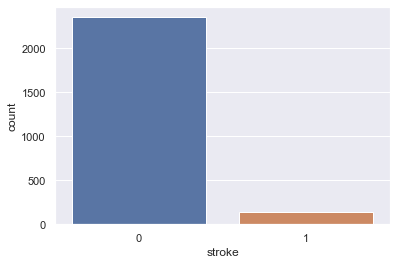

In [57]:
sns.countplot(x=y_train)

##Niezbalansowane dane

Jak widać na wykresie, dane są mocno niezbalansowane. Aby uzyskać lepsze wyniki, należy je zbalanować.

In [54]:
from imblearn.over_sampling import SMOTE
print("Przed zbalansowaniem y=1: {}".format(sum(y_train==1)))
print("Przed zbalansowaniem y=0: {} \n".format(sum(y_train==0)))
print("Przed zbalansowaniem X.shape i Y.shape: '0': {}, {} \n".format(X_train.shape, y_train.shape ))
smt = SMOTE()
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

print('Po zbalansowaniu y=1: {}'.format(sum(y_train_res==1)))
print('Po zbalansowaniu y=0: {}'.format(sum(y_train_res==0)))
print('Po zbalansowaniu X.shape i Y.shape: {}, {} \n'.format(X_train_res.shape, y_train_res.shape))


Przed zbalansowaniem y=1: 142
Przed zbalansowaniem y=0: 2353 

Przed zbalansowaniem X.shape i Y.shape: '0': (2495, 16), (2495,) 

Po zbalansowaniu y=1: 2353
Po zbalansowaniu y=0: 2353
Po zbalansowaniu X.shape i Y.shape: (4706, 16), (4706,) 



<AxesSubplot:xlabel='stroke', ylabel='count'>

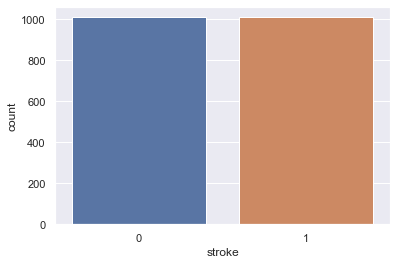

In [104]:
sns.countplot(x=y_resampled)

In [ ]:
plt.pairplot()

##MODELE


1. Logistic Regression
2. Linear SVM
3. Polinomial SVM
4. Rbf SVM
6. Decision trees
7. Ensemble learning
8. Random forests
9. KNeighborsClassifier
10. Ada Boost
11. Gradient Boosting
12. XGBoost

LogisticRegression
LinearSVC
SVC
KNeighborsClassifier
DecisionTreeClassifier
RandomForestClassifier
BaggingClassifier
ExtraTreesClassifier
AdaBoostClassifier
GradientBoostingClassifier
VotingClassifier
xgboost.XGBClassifier




In [53]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import  metrics
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier


## Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)
score = model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
pipeline_12 = Pipeline([('preprocessing', StandardScaler()), ('classifier', GradientBoostingClassifier())])

param_grid_12 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100, 500],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_12 = GridSearchCV(pipeline_12, param_grid_12, cv=kfold, return_train_score=True)

grid_12.fit(X_train_res, y_train_res)
grid_12.best_params_
print(grid_12.best_params_)
#metrics.f1_score(y_test , grid_4.best_estimator_.predict(X_test))

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [45]:
print(metrics.f1_score(y_test , grid_12.best_estimator_.predict(X_test)))
print(metrics.accuracy_score(y_test , grid_12.best_estimator_.predict(X_test))))

SyntaxError: unmatched ')' (<ipython-input-45-ba069d798737>, line 2)

In [ ]:
pipeline_5 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LinearSVC(C=1))])

param_grid_5 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_5 = GridSearchCV(pipeline_5, param_grid_5, cv=kfold, return_train_score=True)
grid_5.fit(X_train_res, y_train_res)
print(grid_5.best_params_)
print(metrics.precision_score(y_test , grid_5.best_estimator_.predict(X_test)))


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

KeyboardInterrupt: ignored